[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-regression-baseline-02.ipynb)


## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 데이터셋 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습, 예측 데이터셋 나누기

In [4]:
# label 값을 기준으로 나눕니다.
# 나누기 전에 label 값을 시각화 합니다.
(df["Insulin"] > 0).value_counts()

True     394
False    374
Name: Insulin, dtype: int64

In [5]:
# train 세트를 만듭니다.

train = df[df["Insulin"] > 0].copy()
train.shape

(394, 9)

In [6]:
# test 세트를 만듭니다.

test = df[df["Insulin"] == 0].copy()
test.shape

(374, 9)

## EDA

/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


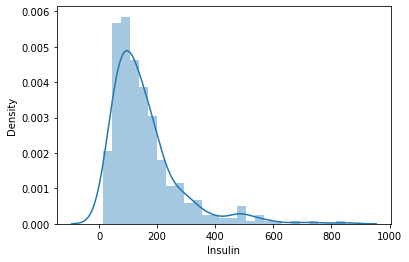

In [7]:
sns.distplot(train["Insulin"])

/Users/corazzon/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


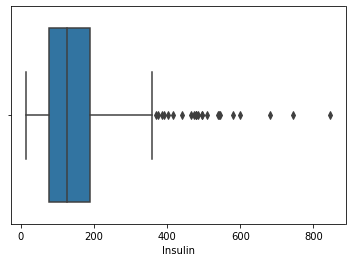

In [8]:
sns.boxplot(train["Insulin"])

In [9]:
desc = train["Insulin"].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

In [10]:
# IQR =  3IQR - 1IQR
# OUT > 3IQR + (IQR * 1.5)
IQR = desc.loc["75%"] - desc.loc["25%"]
OUT = desc.loc["75%"] + (IQR * 1.5)

In [11]:
train[train["Insulin"] > OUT].shape

(24, 9)

In [12]:
print(train.shape)
train = train[train["Insulin"] < OUT]
train.shape

(394, 9)


(370, 9)


## 학습, 예측에 사용할 컬럼

In [13]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.

feature_names = test.columns.tolist()
feature_names.remove("Insulin")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## 정답값이자 예측해야 될 값

In [14]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.

label_name = "Insulin"
label_name

'Insulin'

## 학습, 예측 데이터셋 만들기

In [15]:
# 학습 세트 만들기 예) 시험의 기출문제

X_train = train[feature_names]
X_train.shape

(370, 8)

In [16]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
y_train.shape

(370,)

In [17]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]
X_test.shape

(374, 8)

In [18]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
y_test.shape

(374,)

## 머신러닝 알고리즘 가져오기

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [DecisionTreeRegressor(random_state=42),
         RandomForestRegressor(random_state=42),
         GradientBoostingRegressor(random_state=42)
        ]
estimators

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best'),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
            

In [20]:
max_depth = np.random.randint(5, 30, 10)
max_depth

array([10,  8, 13, 17,  6, 16,  9,  5, 13, 22])

In [21]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.31609919, 0.62827761, 0.60356924, 0.46868257, 0.96871361,
       0.92170435, 0.90272958, 0.6032162 , 0.90871456, 0.86108071])

In [22]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)

pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


In [23]:
from sklearn.model_selection import RandomizedSearchCV

results = []
for estimator in estimators:
    result = []

    max_depth = np.random.randint(5, 30, 100)
    max_features = np.random.uniform(0.3, 1.0, 100)

    param_distributions = {"max_depth": max_depth, "max_features": max_features }

    regressor = RandomizedSearchCV(estimator,
        param_distributions,
        n_iter=100,
        scoring=None,
        n_jobs=-1,
        cv=5,
        verbose=2, 
        random_state=42)

    regressor.fit(X_train, y_train)
    
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   57.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   28.4s finished


In [24]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "params", "estimator", "score", "cv_result"]
df_cv

,model,params,estimator,score,cv_result
0,DecisionTreeRegressor,"{'max_features': 0.5501339001874819, 'max_dept...","DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0.160058,"{'mean_fit_time': [0.009759521484375, 0.006694..."
1,RandomForestRegressor,"{'max_features': 0.6860869902745554, 'max_dept...","(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.346802,"{'mean_fit_time': [0.5657930850982666, 0.50475..."
2,GradientBoostingRegressor,"{'max_features': 0.3107217979997929, 'max_dept...","([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",0.304808,"{'mean_fit_time': [0.2952098846435547, 0.13290..."


In [25]:
best_estimator = df_cv.loc[1, "estimator"]
best_estimator

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features=0.6860869902745554,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [26]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features=0.6860869902745554,
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

## cross validation 으로 학습 세트의 오차 측정하기

In [27]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(best_estimator, X_train, y_train, cv=5, verbose=2, n_jobs=-1)
y_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


array([ 54.85330135, 170.94218384,  91.07336273, 144.73450377,
       173.16037036])

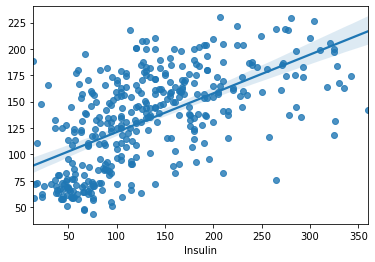

In [47]:
# regplot 으로 결과 값을 비교합니다.

sns.regplot(x=y_train, y=y_predict)

In [48]:
# r2_score 를 구합니다.

from sklearn.metrics import r2_score

r2_score(y_train, y_predict)

0.3590582382944605

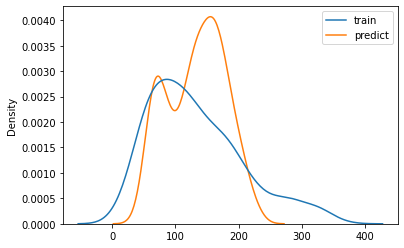

In [53]:
# distplot으로 정답값과 예측값의 분포를 그립니다.

# sns.distplot(y_train, hist=False, label="train")
# sns.distplot(y_predict, hist=False, label="predict")
sns.kdeplot(data=pd.DataFrame({"train":y_train, "predict":y_predict}))

## 오차 구하기

In [31]:
# MAE
# 86
# 77.55
# 62.05
# 44.385 - RandomSearchCV
error = abs(y_train - y_predict)
error.mean()

44.05585391243618

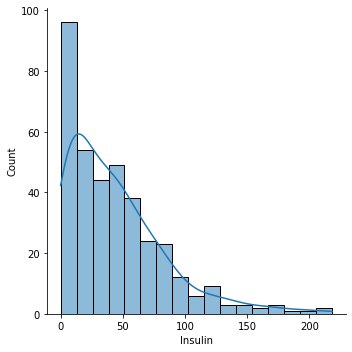

In [55]:
sns.displot(error, kde=True)

In [33]:
error.describe()

count    370.000000
mean      44.055854
std       39.884124
min        0.018965
25%       12.742425
50%       36.427316
75%       61.560264
max      218.166399
Name: Insulin, dtype: float64

In [34]:
# RMSE
# 126.895
# 114.077 (Insulin<600)
# 84
# 59.68
np.sqrt(((y_train - y_predict) ** 2).mean())

59.39160109822888

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.
* 피처의 중요도를 구합니다.

In [35]:
# 피처의 중요도를 추출하기
best_estimator.feature_importances_

array([0.03259473, 0.4821477 , 0.05181559, 0.07811856, 0.1173996 ,
       0.08845975, 0.09899999, 0.05046408])

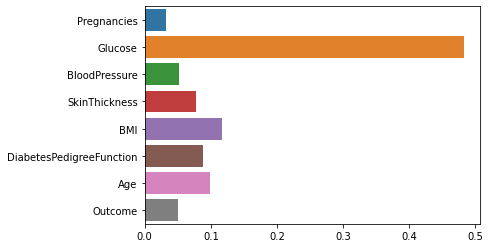

In [36]:
# 피처의 중요도 시각화 하기
sns.barplot(x=best_estimator.feature_importances_, y=feature_names)

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.
* Insulin 이 0인 값을 예측 했기 때문에 정답을 알 수 없습니다.
* 따라서 점수는 train set로 측정한 값을 참고합니다.

In [37]:
y_test = best_estimator.predict(X_test)
y_test[:5]

array([186.46941716,  58.63397454, 189.12541811, 139.6808322 ,
       161.54815704])

In [38]:
train.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,254.0,115.917323,69.844697,15.0,64.25,100.0,151.00,342.0
1,116.0,169.163793,70.789454,14.0,124.25,160.0,207.75,360.0


In [39]:
test["Insulin"] = y_test

In [40]:
test.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,236.0,131.214565,40.889579,55.142117,96.020746,136.691759,163.722273,225.607853
1,138.0,169.795006,28.789807,95.007078,150.782953,171.083539,190.809340,247.810503


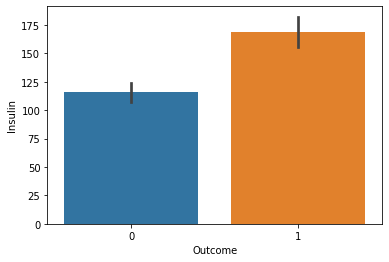

In [41]:
# Insulin 평균값을 출력
sns.barplot(data=train, x="Outcome", y="Insulin")

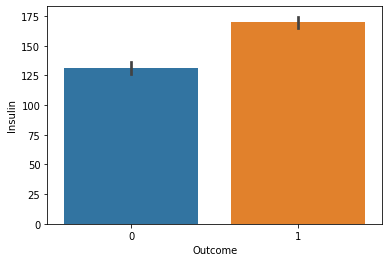

In [42]:
# 예측값
sns.barplot(data=test, x="Outcome", y="Insulin")

## 예측값을 CSV 파일로 저장하기
* 랜덤값을 넣어서 최적의 파라메터를 찾았기 때문에 예측한 Insulin 값이 영상과 다를 수 있습니다.

In [43]:
df.loc[df["Insulin"] == 0, "Insulin"]

0      0
1      0
2      0
5      0
7      0
      ..
761    0
762    0
764    0
766    0
767    0
Name: Insulin, Length: 374, dtype: int64

In [44]:
df.loc[df["Insulin"] == 0, "Insulin"] = test["Insulin"]

In [45]:
df.to_csv("data/diabetes_fill_insulin.csv", index=False)

In [46]:
pd.read_csv("data/diabetes_fill_insulin.csv")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,186.469417,33.6,0.627,50,1
1,1,85,66,29,58.633975,26.6,0.351,31,0
2,8,183,64,0,189.125418,23.3,0.672,32,1
3,1,89,66,23,94.000000,28.1,0.167,21,0
4,0,137,40,35,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.000000,32.9,0.171,63,0
764,2,122,70,27,155.038392,36.8,0.340,27,0
765,5,121,72,23,112.000000,26.2,0.245,30,0
766,1,126,60,0,155.710002,30.1,0.349,47,1
